In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [55]:
df = pd.read_csv('adult.csv')
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


в колонках workclass, occupation, native-country имеются пропуски

In [34]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df['workclass'].unique(), df['education'].unique(), df['marital-status'].unique(), df['occupation'].unique(), df['relationship'].unique(), df['race'].unique(), df['native-country'].unique()   

(array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
        'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
       dtype=object),
 array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
        'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
        'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
        'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
       dtype=object),
 array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
        'Other-relative'], dtype=object),
 array(['Black', 'White', 'As

In [12]:
df['workclass'].value_counts(), df['occupation'].value_counts(), df['native-country'].value_counts()

(Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 Name: workclass, dtype: int64,
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
 Name: occupation, dtype: int64,
 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                

In [56]:
 df.drop(df[(df['occupation'] == '?') | (df['native-country']== '?')].index, inplace=True)

In [37]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


около 3600 строк с пропусками удалено

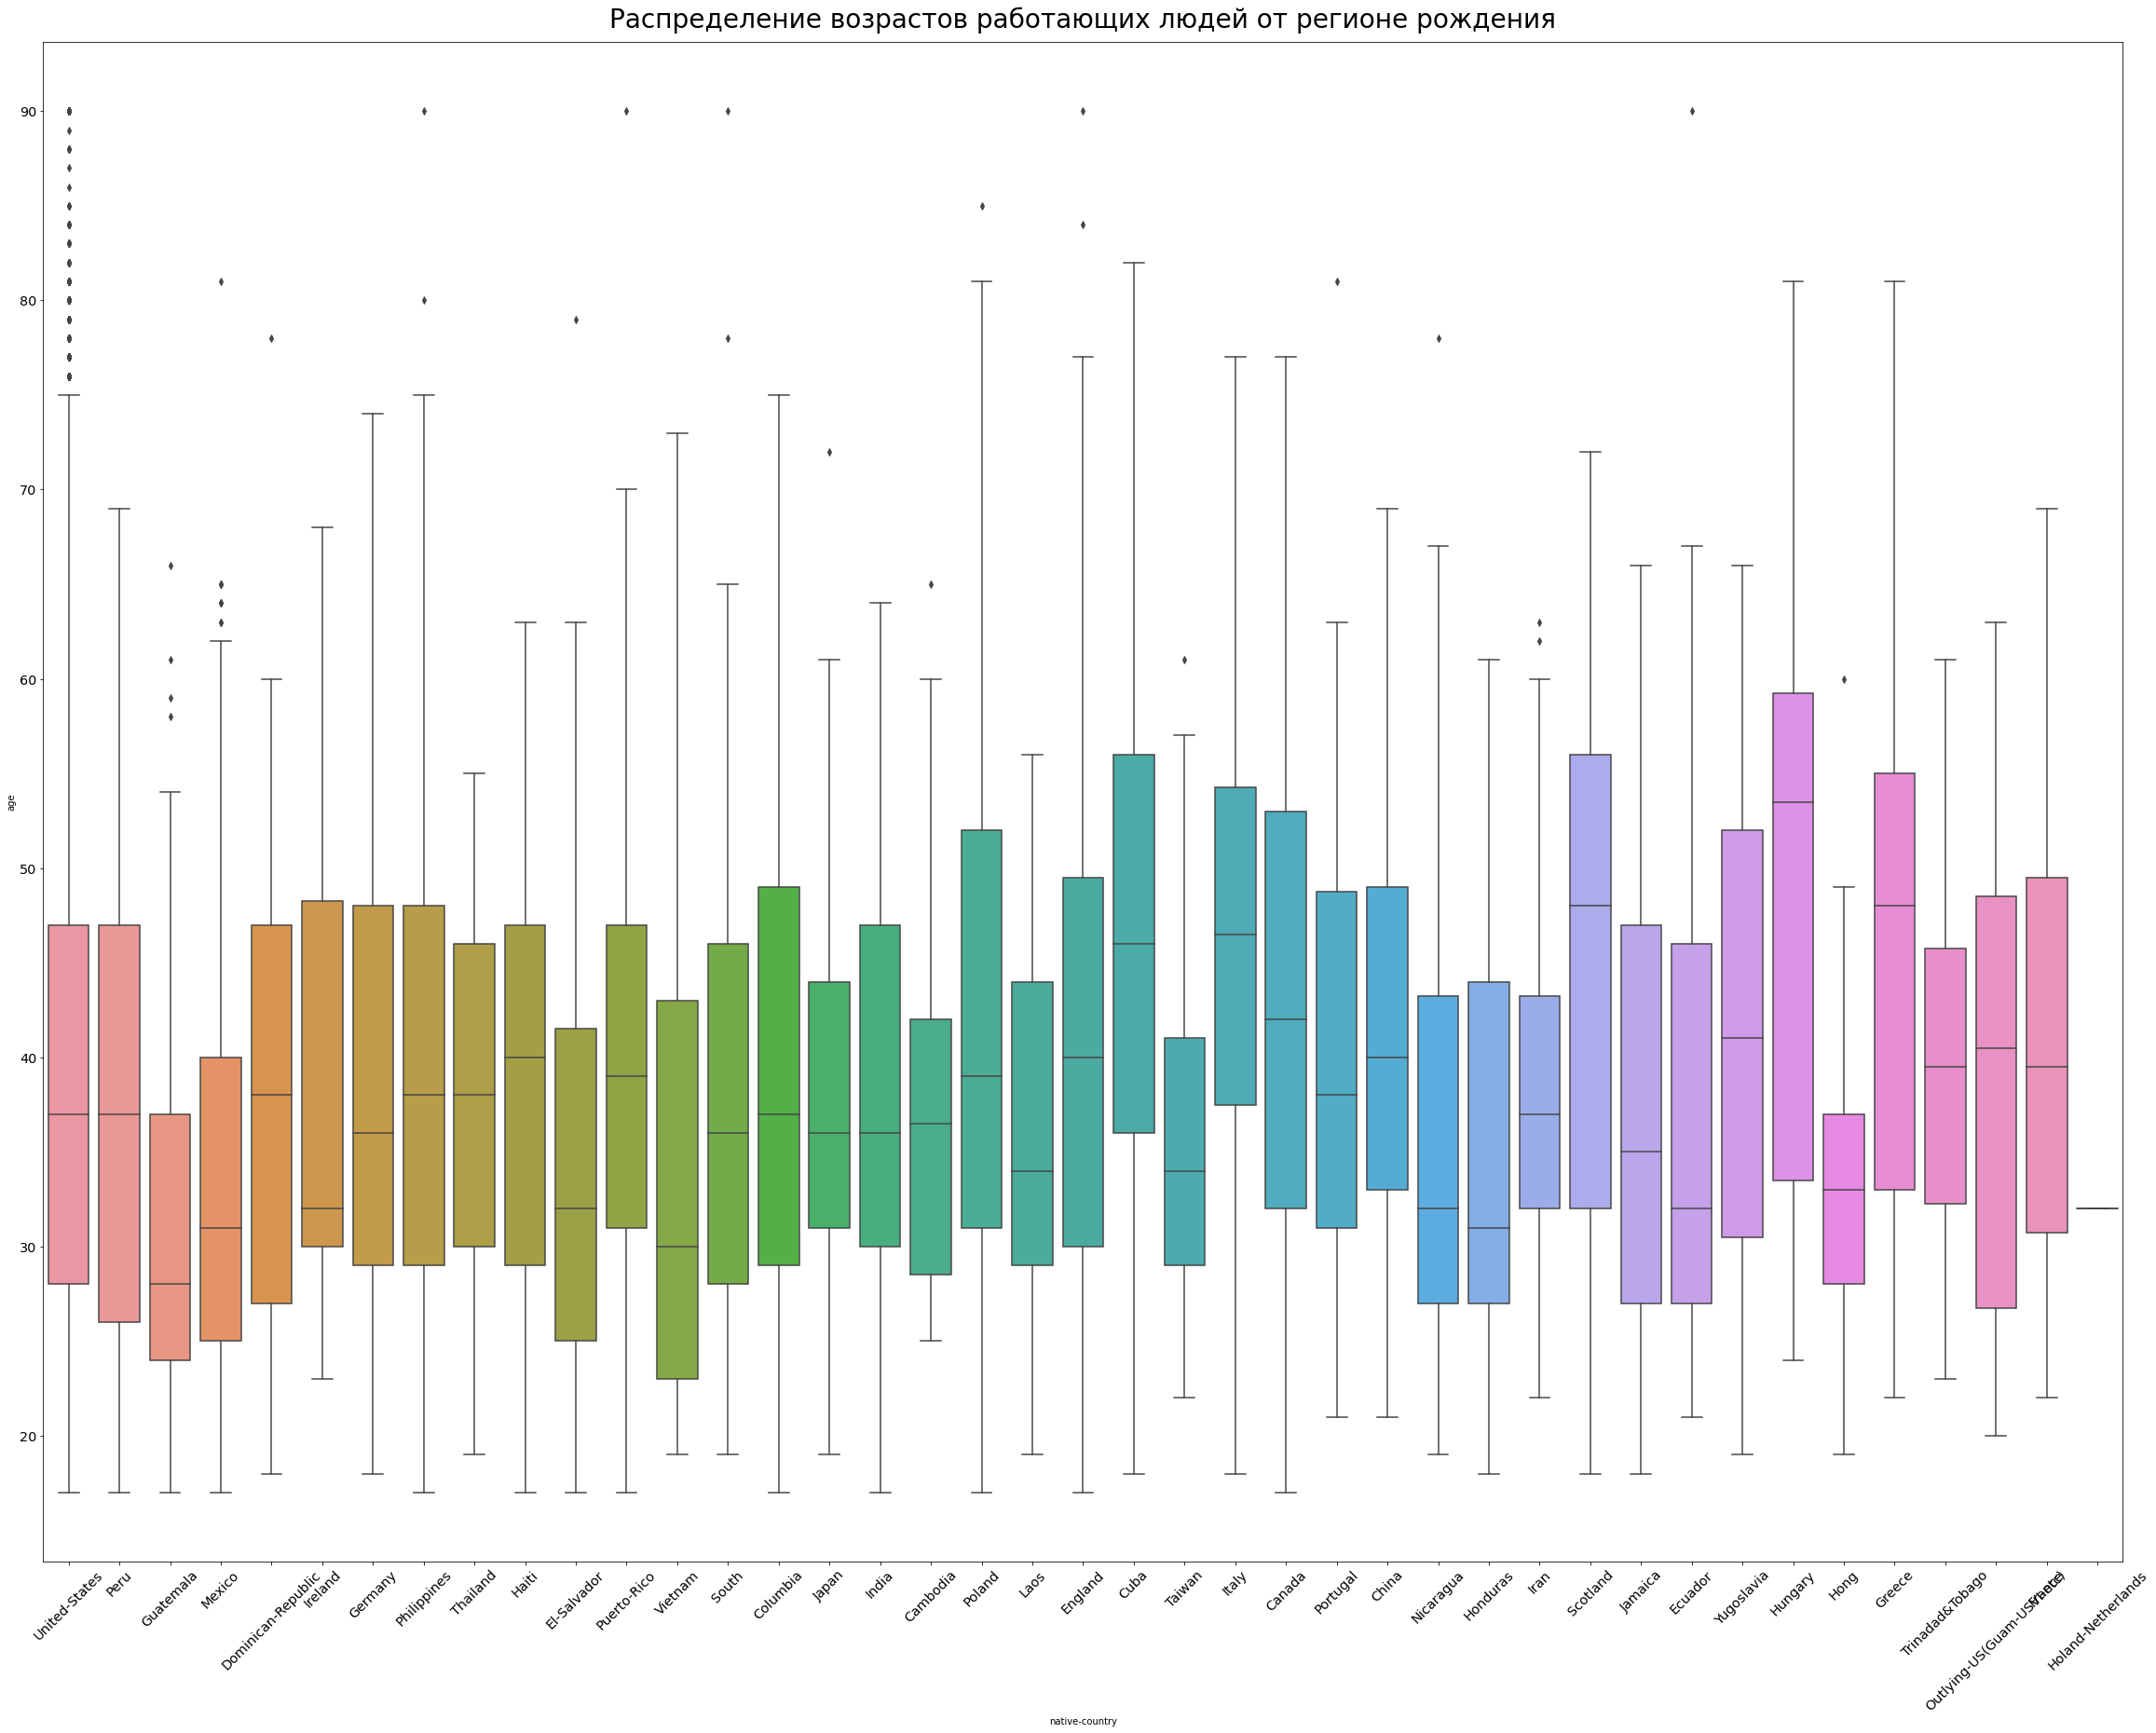

In [80]:
age_country = df[['native-country', 'age']]

fig, ax = plt.subplots()

fig.set_figheight(30)
fig.set_figwidth(40)

params = {
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.xticks(rotation=45)

a = sns.boxplot(x="native-country", y="age", data=age_country)
a.set_title('Распределение возрастов работающих людей от региона рождения', fontdict={'fontsize':28}, pad=16);

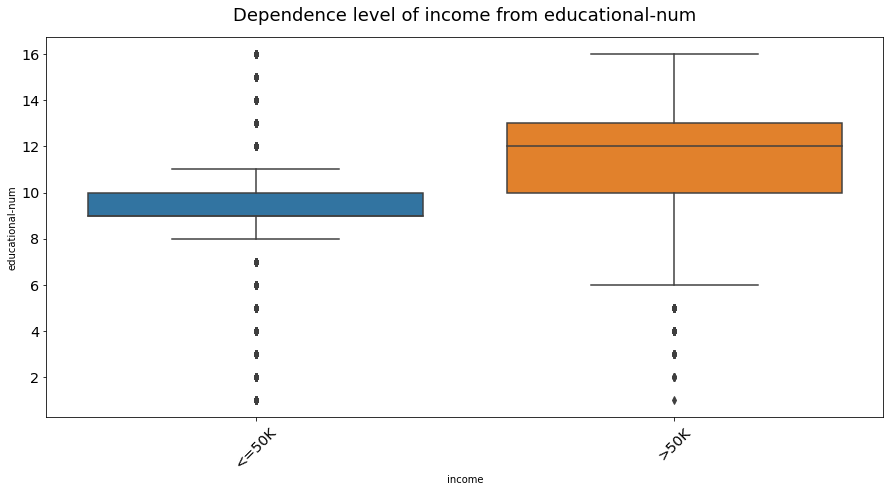

In [88]:
income_edu_num = df[['educational-num', 'income']]

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

params = {
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.xticks(rotation=45)

a = sns.boxplot(x="income", y="educational-num", data=income_edu_num)
a.set_title('Dependence level of income from educational-num', fontdict={'fontsize':18}, pad=16);

очевидно, что люди с более высоким доходом потратили на образование больше времени

In [38]:
x = df
le = LabelEncoder()
le.fit(df['income']) 
y = pd.Series (data = le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [39]:
del x['income']

# преобразовываем категориальные признаки

le.fit(x['workclass'])
x['wc'] = le.transform(x['workclass'])
del x['workclass']

le.fit(x['education'])
x['edu'] = le.transform(x['education'])
del x['education']

le.fit(x['educational-num'])
x['edunum'] = le.transform(x['educational-num'])
del x['educational-num']

le.fit(x['marital-status'])
x['marstat'] = le.transform(x['marital-status'])
del x['marital-status']

le.fit(x['occupation'])
x['occup'] = le.transform(x['occupation'])
del x['occupation']

le.fit(x['relationship'])
x['rs'] = le.transform(x['relationship'])
del x['relationship']

le.fit(x['race'])
x['race_'] = le.transform(x['race'])
del x['race']

le.fit(x['gender'])
x['gen'] = le.transform(x['gender'])
del x['gender']

le.fit(x['native-country'])
x['natcountry'] = le.transform(x['native-country'])
del x['native-country']

x.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,wc,edu,edunum,marstat,occup,rs,race_,gen,natcountry
0,25,226802,0,0,40,2,1,6,4,6,3,2,1,38
1,38,89814,0,0,50,2,11,8,2,4,0,4,1,38
2,28,336951,0,0,40,1,7,11,2,10,0,4,1,38
3,44,160323,7688,0,40,2,15,9,2,6,0,2,1,38
5,34,198693,0,0,30,2,0,5,4,7,1,4,1,38


строим модель логистической регрессии: перед разделением данных на тест и обучение, нормализуем их

In [41]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [42]:
model = LogisticRegression()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
model.score(x_train, y_train) 

0.7928518119247036

In [47]:
model.score(x_test,y_test)

0.7976782752902156

получили достаточно хороший результат на тестовой выборке (не просел в сравнении с обучением) для логистической регрессии

теперь применяем метод опорных векторов: перед разделением данных на тест и обучение, нормализуем их

In [49]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [50]:
clf.score(x_train, y_train)

0.8515631478563729

In [51]:
clf.score(x_test, y_test)

0.8501934770591487

In [ ]:
результат классификации с помощью опорных векторов лучше, чем с логистической регрессии